# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Double Checking The Data

In [2]:
df = pd.read_csv('Processed_data.csv')
df.head()

,amount,currency,created,captured,status,city,country,state,postal_code,card_brand,last4,exp_month,exp_year,cvc_check,risk_level,risk_score,network_status,seller_message,fraud_reason,is_fraud
0,1000,0,1613730412,0,2,19617,0,43,66270,0,9610,5,2035,1,0,40,1,1,6,1
1,1514,0,1727729019,0,1,39482,0,7,67020,3,5509,5,2035,0,2,46,0,0,0,1
2,50,0,1660816953,0,2,63955,0,19,594,1,1498,5,2026,1,2,79,1,1,6,1
3,2000,0,1697940703,1,2,49901,0,9,51424,2,6135,9,2027,0,2,28,0,1,6,1
4,1000,1,1680874645,1,2,5717,0,43,67111,0,3783,7,2033,1,2,26,0,0,5,1


In [3]:
df.isna().sum()

amount            0
currency          0
created           0
captured          0
status            0
city              0
country           0
state             0
postal_code       0
card_brand        0
last4             0
exp_month         0
exp_year          0
cvc_check         0
risk_level        0
risk_score        0
network_status    0
seller_message    0
fraud_reason      0
is_fraud          0
dtype: int64

In [4]:
print(df.columns.tolist())

['amount', 'currency', 'created', 'captured', 'status', 'city', 'country', 'state', 'postal_code', 'card_brand', 'last4', 'exp_month', 'exp_year', 'cvc_check', 'risk_level', 'risk_score', 'network_status', 'seller_message', 'fraud_reason', 'is_fraud']


In [5]:
df.head()

,amount,currency,created,captured,status,city,country,state,postal_code,card_brand,last4,exp_month,exp_year,cvc_check,risk_level,risk_score,network_status,seller_message,fraud_reason,is_fraud
0,1000,0,1613730412,0,2,19617,0,43,66270,0,9610,5,2035,1,0,40,1,1,6,1
1,1514,0,1727729019,0,1,39482,0,7,67020,3,5509,5,2035,0,2,46,0,0,0,1
2,50,0,1660816953,0,2,63955,0,19,594,1,1498,5,2026,1,2,79,1,1,6,1
3,2000,0,1697940703,1,2,49901,0,9,51424,2,6135,9,2027,0,2,28,0,1,6,1
4,1000,1,1680874645,1,2,5717,0,43,67111,0,3783,7,2033,1,2,26,0,0,5,1


In [6]:
import dython
from dython.nominal import associations



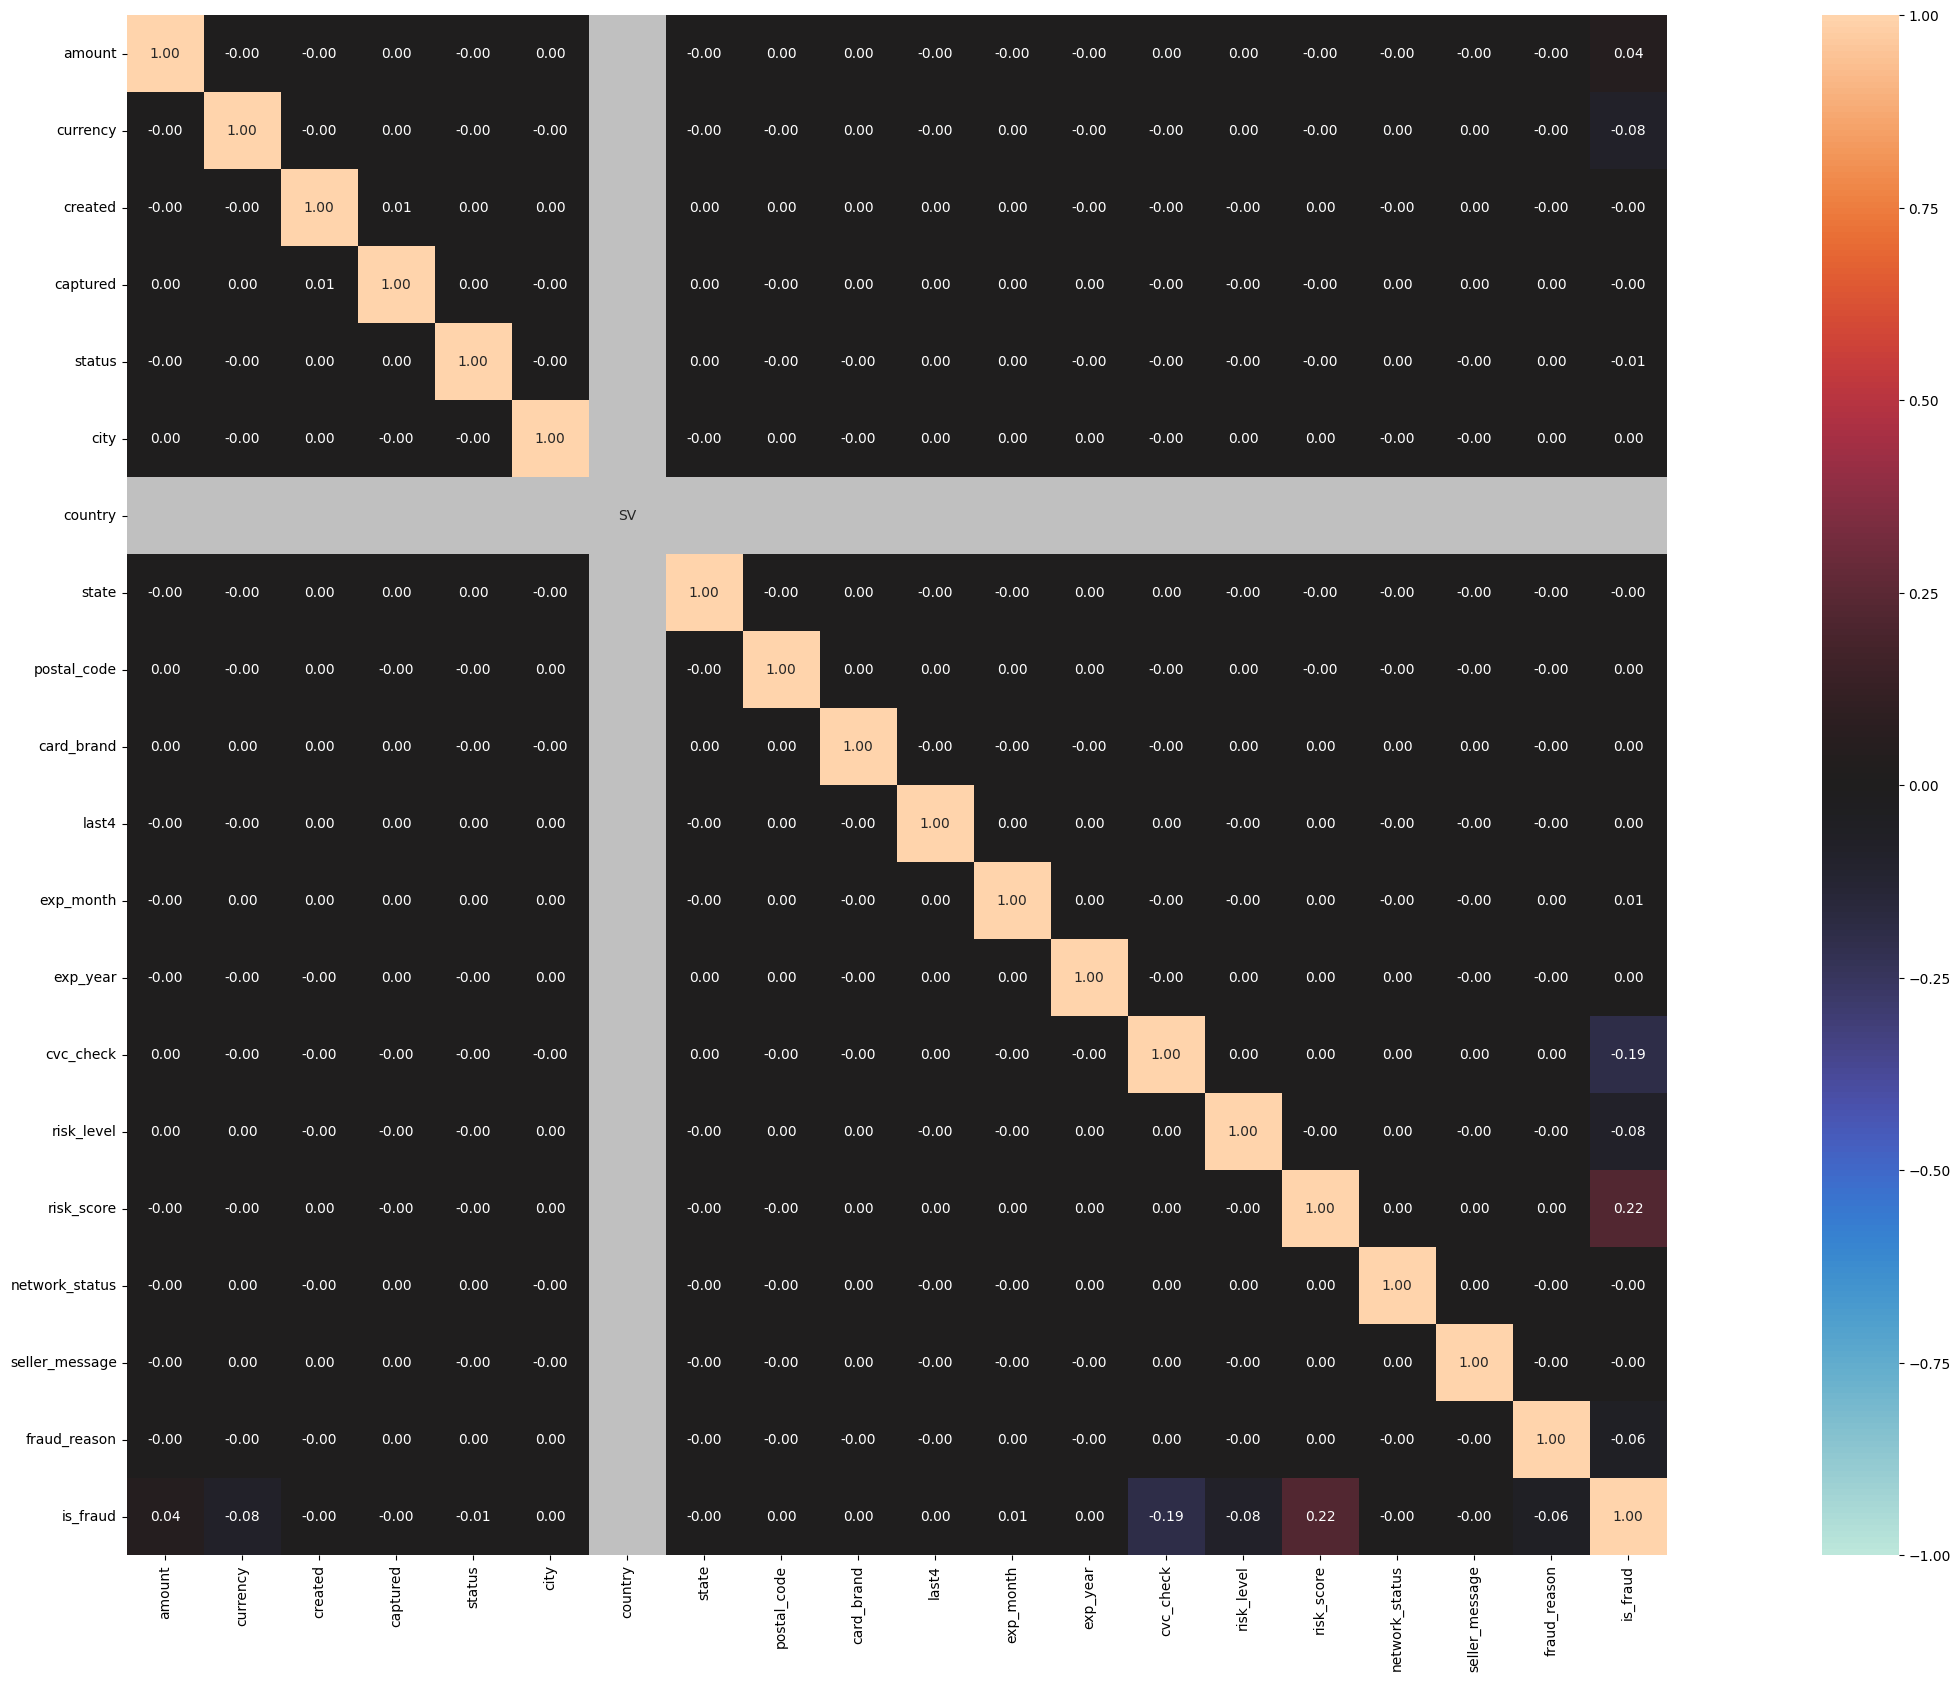

In [7]:
associations(df, figsize = (40, 20))
plt.show()

# we se that iscanceled have 1.00 cancellation have 1.00 correlation with reservationn status so will not use reservation status
# as reservation status tell you is the booking already canceled or check out or no show 
# and reservation status date will be dropped as well as our goals is to predict

In [8]:
df.head()

,amount,currency,created,captured,status,city,country,state,postal_code,card_brand,last4,exp_month,exp_year,cvc_check,risk_level,risk_score,network_status,seller_message,fraud_reason,is_fraud
0,1000,0,1613730412,0,2,19617,0,43,66270,0,9610,5,2035,1,0,40,1,1,6,1
1,1514,0,1727729019,0,1,39482,0,7,67020,3,5509,5,2035,0,2,46,0,0,0,1
2,50,0,1660816953,0,2,63955,0,19,594,1,1498,5,2026,1,2,79,1,1,6,1
3,2000,0,1697940703,1,2,49901,0,9,51424,2,6135,9,2027,0,2,28,0,1,6,1
4,1000,1,1680874645,1,2,5717,0,43,67111,0,3783,7,2033,1,2,26,0,0,5,1


In [9]:
df.head()

,amount,currency,created,captured,status,city,country,state,postal_code,card_brand,last4,exp_month,exp_year,cvc_check,risk_level,risk_score,network_status,seller_message,fraud_reason,is_fraud
0,1000,0,1613730412,0,2,19617,0,43,66270,0,9610,5,2035,1,0,40,1,1,6,1
1,1514,0,1727729019,0,1,39482,0,7,67020,3,5509,5,2035,0,2,46,0,0,0,1
2,50,0,1660816953,0,2,63955,0,19,594,1,1498,5,2026,1,2,79,1,1,6,1
3,2000,0,1697940703,1,2,49901,0,9,51424,2,6135,9,2027,0,2,28,0,1,6,1
4,1000,1,1680874645,1,2,5717,0,43,67111,0,3783,7,2033,1,2,26,0,0,5,1


## Model Building

In [8]:
X = df[['amount','currency','created','captured','status','city','country','state','postal_code','card_brand','exp_month','exp_year','cvc_check','risk_level','risk_score',	'network_status','seller_message','fraud_reason']]
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [9]:
X_train.head()

,amount,currency,created,captured,status,city,country,state,postal_code,card_brand,exp_month,exp_year,cvc_check,risk_level,risk_score,network_status,seller_message,fraud_reason
14582,500,0,1621294996,0,2,61332,0,39,14458,3,3,2027,1,2,64,0,1,0
232980,1000,0,1706694293,1,2,20870,0,31,98142,2,9,2032,0,2,2,1,0,1
203460,1000,0,1645998112,1,0,57994,0,10,49111,1,6,2028,0,2,62,1,1,6
332292,1000,0,1639982581,0,2,7348,0,47,46555,0,8,2030,0,2,37,0,0,6
197197,100,0,1654634845,1,2,54976,0,37,37619,0,5,2031,0,0,28,1,1,1


In [10]:
num_columns = ['amount','currency','created','captured','status','city','country','state','postal_code','card_brand','exp_month','exp_year','cvc_check','risk_level','risk_score',	'network_status','seller_message','fraud_reason']

In [13]:
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

prepocessor = ColumnTransformer([
    ('numerical', numerical_pipeline,num_columns)
])

pipe_logreg = Pipeline([
    ("prep", prepocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ('prep', prepocessor),
    ('algo', KNeighborsClassifier())
])


pipe_RF = Pipeline([
    ("prep", prepocessor),
    ("algo", RandomForestClassifier())
])

pipe_DT = Pipeline([
    ("prep", prepocessor),
    ("algo", DecisionTreeClassifier())
])

pipe_XGB = Pipeline([
    ("prep", prepocessor),
    ("algo", XGBClassifier())
])

# this is preparring all the the pipeline model to predict all using few algorithm and we will hypertune it using
# the algorithm that we set up as well

### Logistic Regression

In [14]:
pipe_logreg.fit(X_train, y_train)
y_pred_logreg_base =  pipe_logreg.predict(X_test)
y_pred_logreg_base_train = pipe_logreg.predict(X_train)

In [15]:
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
acc_logreg_base_train = accuracy_score(y_train, y_pred_logreg_base_train)

print(f"Training Accuracy : {acc_logreg_base_train}")
print(f"Testing Accuracy : {acc_logreg_base}")

# we see here that the model is not over fit or underfitting using logistic regression model

Training Accuracy : 0.9430675287356322
Testing Accuracy : 0.9433333333333334


In [16]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.40      0.06      0.11      3833
           1       0.95      0.99      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.68      0.53      0.54     69600
weighted avg       0.92      0.94      0.92     69600



In [17]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_base

,Prediksi 1,Prediksi 0
aktual 1,65422,345
aktual 0,3599,234


<Axes: >

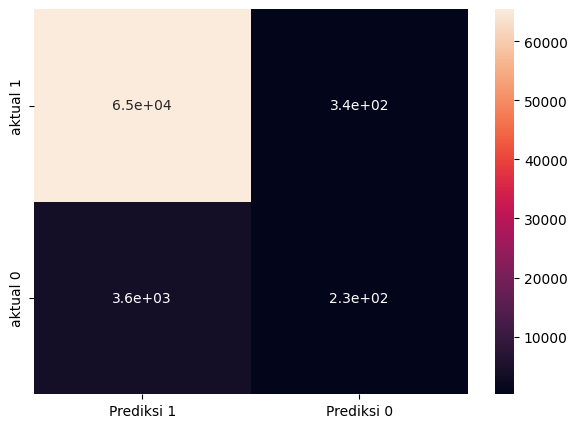

In [18]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_logreg_base, annot = True)

# we see that using logistic regression we have around 1200 ++ false positive in this case (not cancelled booking) thats predicted
# to be cancelled
# and we have around 3300 ++ False Negative means (cancelled booking that's considered not cancelled)

### KNN

In [19]:
pipe_KNN.fit(X_train, y_train)
y_pred_KNN_base =  pipe_KNN.predict(X_test)
y_pred_KNN_base_train = pipe_KNN.predict(X_train)

In [20]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
acc_KNN_base_train = accuracy_score(y_train, y_pred_KNN_base_train)

print(f"Training Accuracy : {acc_KNN_base_train}")
print(f"Testing Accuracy : {acc_KNN_base}")

# in KNN model we see that there is overfitting condition in KNN model
# even though KNN has a better accuracy score compared to logistic Regression
# we will fix it later on in hyperparameter tuning

Training Accuracy : 0.9498563218390804
Testing Accuracy : 0.9378879310344828


In [21]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.27      0.07      0.12      3833
           1       0.95      0.99      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.61      0.53      0.54     69600
weighted avg       0.91      0.94      0.92     69600



In [22]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_base

,Prediksi 1,Prediksi 0
aktual 1,64991,776
aktual 0,3547,286


<Axes: >

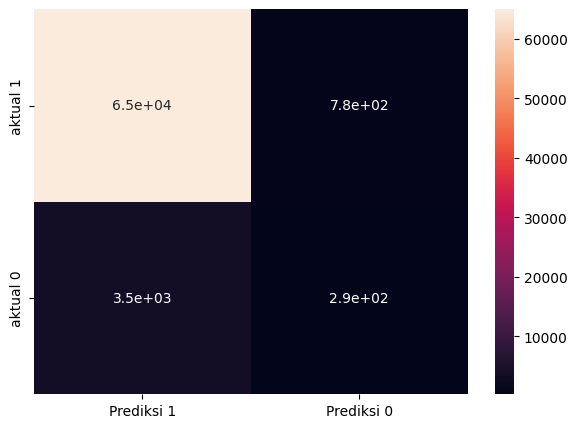

In [23]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_KNN_base, annot = True)

# compared to logistic regression KNN model has a lower False negative (not cancelled prediction actual  canceled)
# however it has a higher False Positive (prediction cancelled actual not cancelled)

### Decision Tree

In [24]:
pipe_DT.fit(X_train, y_train)
y_pred_DT_base =  pipe_DT.predict(X_test)
y_pred_DT_base_train = pipe_DT.predict(X_train)

In [25]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
acc_DT_base_train = accuracy_score(y_train, y_pred_DT_base_train)

print(f"Training Accuracy : {acc_DT_base_train}")
print(f"Testing Accuracy : {acc_DT_base}")

# we see that there's overfitting condition in Decision Tree as well 
# however we will try to adjust the parameter to prevent the overfitting condition

Training Accuracy : 1.0
Testing Accuracy : 0.9060344827586206


In [26]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.20      0.24      0.22      3833
           1       0.96      0.95      0.95     65767

    accuracy                           0.91     69600
   macro avg       0.58      0.59      0.58     69600
weighted avg       0.91      0.91      0.91     69600



In [27]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT_base

,Prediksi 1,Prediksi 0
aktual 1,62155,3612
aktual 0,2928,905


<Axes: >

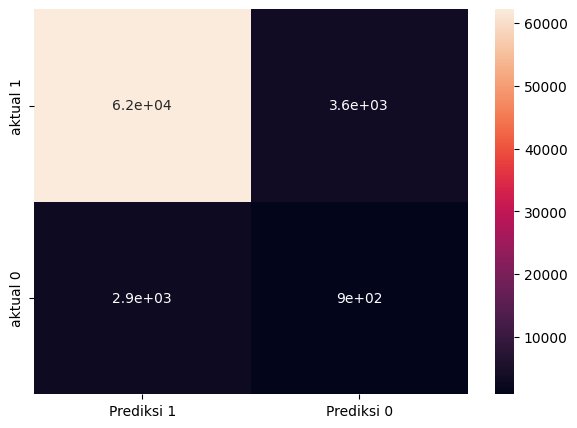

In [28]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_DT_base, annot = True)


### Random Forest

In [15]:
model=pipe_RF.fit(X_train, y_train)
y_pred_RF_base =  pipe_RF.predict(X_test)
y_pred_RF_base_train = pipe_RF.predict(X_train)

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [30]:
recall_RF_base = recall_score(y_test, y_pred_RF_base)
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
precision_RF_base = precision_score(y_test, y_pred_RF_base)
f1_RF_base = f1_score(y_test, y_pred_RF_base)
acc_RF_base_train = accuracy_score(y_train, y_pred_RF_base_train)

print(f"Training Accuracy : {acc_RF_base_train}")
print(f"Testing Accuracy : {acc_RF_base}")

# we also have an overfitting condition for Random Forest model as well in this case 
# we also will fix it later on the hyperparameter tuning

Training Accuracy : 0.999992816091954
Testing Accuracy : 0.9445545977011495


In [31]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.37      0.01      0.02      3833
           1       0.95      1.00      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.66      0.50      0.50     69600
weighted avg       0.91      0.94      0.92     69600



In [32]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels = [1,0])
df_RF_base = pd.DataFrame(data = cm_RF_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_RF_base

,Prediksi 1,Prediksi 0
aktual 1,65704,63
aktual 0,3796,37


<Axes: >

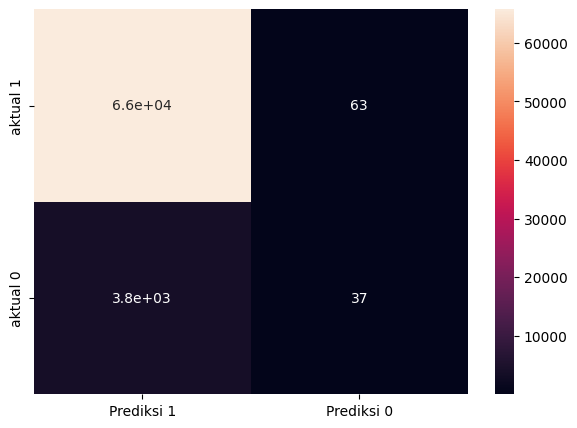

In [33]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_RF_base, annot = True)

In [34]:
pipe_XGB.fit(X_train, y_train)
y_pred_XGB_base =  pipe_XGB.predict(X_test)
y_pred_XGB_base_train = pipe_XGB.predict(X_train)

In [35]:
recall_XGB_base = recall_score(y_test, y_pred_XGB_base)
acc_XGB_base = accuracy_score(y_test, y_pred_XGB_base)
precision_XGB_base = precision_score(y_test, y_pred_XGB_base)
f1_XGB_base = f1_score(y_test, y_pred_XGB_base)
acc_XGB_base_train = accuracy_score(y_train, y_pred_XGB_base_train)

print(f"Training Accuracy : {acc_XGB_base_train}")
print(f"Testing Accuracy : {acc_XGB_base}")


Training Accuracy : 0.9472701149425288
Testing Accuracy : 0.9443247126436781


In [36]:
print(classification_report(y_test, y_pred_XGB_base))

              precision    recall  f1-score   support

           0       0.39      0.02      0.04      3833
           1       0.95      1.00      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.67      0.51      0.51     69600
weighted avg       0.92      0.94      0.92     69600



In [37]:
cm_XGB_base = confusion_matrix(y_test, y_pred_XGB_base, labels = [1,0])
df_XGB_base = pd.DataFrame(data = cm_XGB_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_XGB_base

,Prediksi 1,Prediksi 0
aktual 1,65647,120
aktual 0,3755,78


<Axes: >

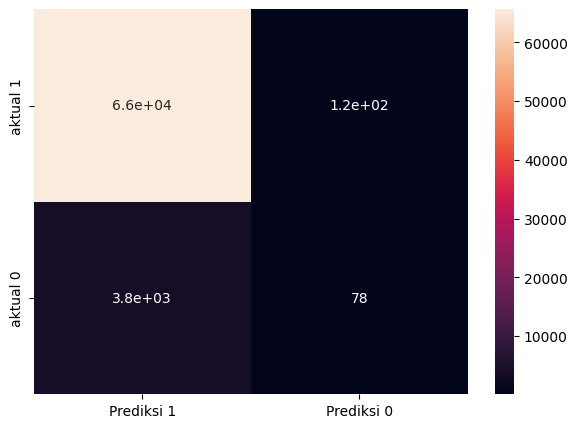

In [38]:
plt.figure(figsize = (7, 5))
sns.heatmap(df_XGB_base, annot = True)

### Evaluation Comparing Each Models Evaluation Matrix 

In [39]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [40]:
evaluation_matrix_base = {
    'Logistic Regression': [acc_logreg_base, recall_logreg_base, precision_logreg_base, f1_logreg_base],
    'KNN':[acc_KNN_base,recall_KNN_base,precision_KNN_base, f1_KNN_base],
    'Decision Tree':[acc_DT_base, recall_DT_base, precision_DT_base, f1_DT_base],
    'Random Forest':[acc_RF_base, recall_RF_base, precision_RF_base, f1_RF_base],
    'XGB':[acc_XGB_base, recall_XGB_base, precision_XGB_base, f1_XGB_base]
}

eva_base = pd.DataFrame(data = evaluation_matrix_base, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_base_training = {
    "training" : [acc_logreg_base_train, acc_KNN_base_train, acc_DT_base_train, acc_RF_base_train, acc_XGB_base_train],
    "testing": [acc_logreg_base, acc_KNN_base, acc_DT_base, acc_RF_base, acc_XGB_base]
}
    

eva_base_train = pd.DataFrame(data = evaluation_matrix_base_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'])

display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])



# we see that from the evaluation matrix Decision Tree and Random Forest has the highest score in training 
# however we see that both algorithm has an overfitting condition 
# same goes to KNN it also have an overfitting condition 

# the only algorithm that doesn't have an overfitting condition is Logistic Regression & XGB
# however we will do hyperparameter tuning on all of them to fix the overfitting condition

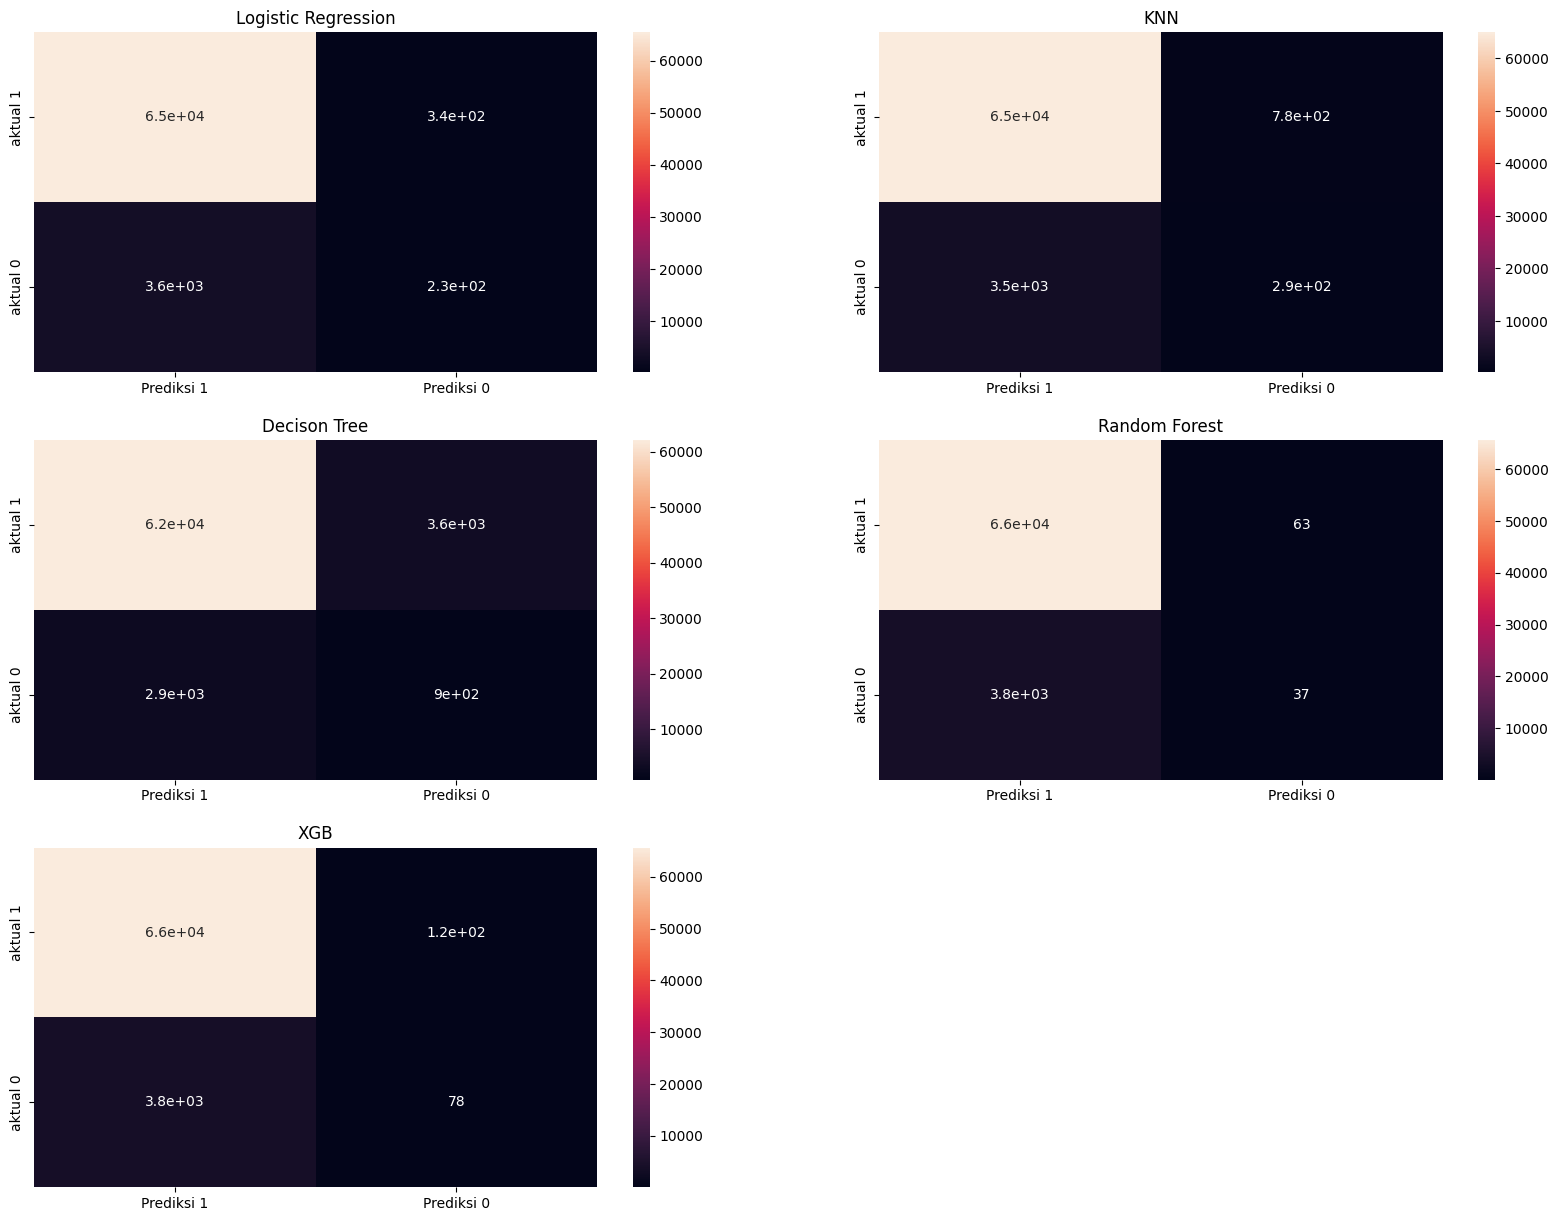

In [41]:
# confusion Matrix Figure For All The Chart 

plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_base, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_base, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_base, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(df_RF_base, annot = True)
plt.title('Random Forest')

plt.subplot(3,2,5)
sns.heatmap(df_XGB_base, annot = True)
plt.title("XGB")

plt.show()

# we will focus on 2 algorithms that doesn't have overfitting condition (Logistic Regression & XGB)

# XGB :
# XGB has more False Positive compared to XGB (predicting cancellation actually not cancelled)
# this might lead into overbooking for the hotel side (more booking compared to the hotel rooms)


# Logistic Regression : 
# Logistic Regression has more false negative compared to XGB (Preidiction not canceled actually canceled)
# this might lead into messing up revenue management (lower adr rate) or maybe even leads into unsold rooms due to cancellation 


### Hyperparameter Tuning


#### Logistic Regression 

In [42]:
pipe_logreg.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['amount', 'currency', 'created', 'captured',
                                     'status', 'city', 'country', 'state',
                                     'postal_code', 'card_brand', 'exp_month',
                                     'exp_year', 'cvc_check', 'risk_level',
                                     'risk_score', 'network_status',
                                     'seller_message', 'fraud_reason'])])),
  ('algo', LogisticRegression())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                                  ['amount', 'currency', 'created', 'captured',
                                   'status', 'city', 'country', 'state',
                                 

In [43]:
param_logreg = {
    'algo__penalty':['l2', 'l1', 'elasticnet'],
    'algo__C':[1.0, 2.0, 3.0, 0.5, 0.1],
    'algo__class_weight':[None, 'balanced']
}

model_logreg = GridSearchCV(estimator=pipe_logreg, param_grid=param_logreg, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_logreg.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['amount',
                                                                          'currency',
                                                                          'created',
                                                                          'captured',
                                                                          'status',
                                                                          'city',
                                                                          'country',
                                                                          'state',
                                                                          'postal_code',
                                                                          'card_brand',
                                                                          'exp_month',
                                                                          'exp_year',
                                                                          'cvc_check',
                                                                          'risk_level',
                                                                          'risk_score',
                                                                          'network_status',
                                                                          'seller_message',
                                                                          'fraud_reason'])])),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': [1.0, 2.0, 3.0, 0.5, 0.1],
                         'algo__class_weight': [None, 'balanced'],
                         'algo__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [44]:
logreg_tuned = model_logreg.best_estimator_
logreg_tuned_train = model_logreg.best_score_
y_pred_logreg_tuned = logreg_tuned.predict(X_test) 

In [45]:
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned_train = logreg_tuned_train

print(f"Training Accuracy : {acc_logreg_tuned_train}")
print(f"Testing Accuracy : {acc_logreg_tuned}")


# logistic regression doesn't have an overfitting condition from the based model however it seems doesn't effect the accuracy of it


Training Accuracy : 0.9431860632183908
Testing Accuracy : 0.9433764367816092


In [46]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.40      0.06      0.10      3833
           1       0.95      0.99      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.68      0.53      0.54     69600
weighted avg       0.92      0.94      0.92     69600



In [47]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_logreg_base, df_logreg_tuned], ['Base Model', 'Tuned Model'])

# we see that comparing both of the model we see that base model has a slightly more True Positive 
# while tuned model has slightly more True Negative and and slightly less true  true positive

,Prediksi 1,Prediksi 0
aktual 1,65422,345
aktual 0,3599,234
,Prediksi 1,Prediksi 0
aktual 1,65431,336
aktual 0,3605,228


Text(0.5, 1.0, 'Tuned Model')

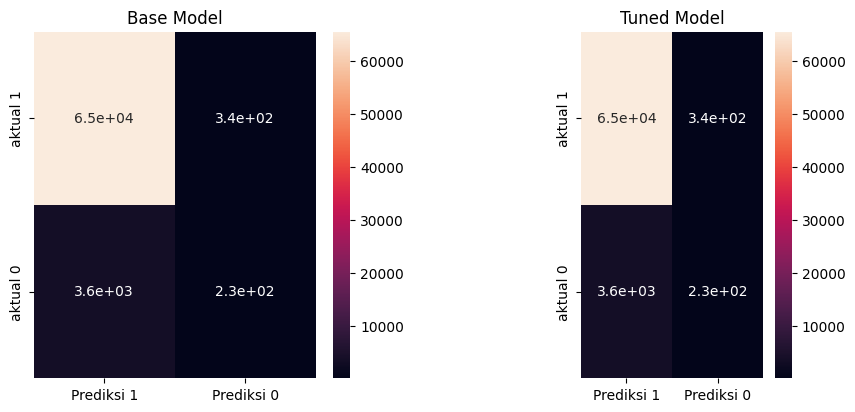

In [48]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_logreg_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_logreg_tuned, annot = True)
plt.title('Tuned Model')

#### KNN 

In [49]:
pipe_KNN.get_params()



{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['amount', 'currency', 'created', 'captured',
                                     'status', 'city', 'country', 'state',
                                     'postal_code', 'card_brand', 'exp_month',
                                     'exp_year', 'cvc_check', 'risk_level',
                                     'risk_score', 'network_status',
                                     'seller_message', 'fraud_reason'])])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                                  ['amount', 'currency', 'created', 'captured',
                                   'status', 'city', 'country', 'state',
                               

In [50]:
param_KNN = {
    'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
    'algo__weights':['uniform', 'distance'],
    'algo__p':[2,1]
}

model_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_KNN, cv = 3, n_jobs = -1, verbose = 1)
model_KNN.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['amount',
                                                                          'currency',
                                                                          'created',
                                                                          'captured',
                                                                          'status',
                                                                          'city',
                                                                          'country',
                                                                          'state',
                                                                          'postal_code',
                                                                          'card_brand',
                                                                          'exp_month',
                                                                          'exp_year',
                                                                          'cvc_check',
                                                                          'risk_level',
                                                                          'risk_score',
                                                                          'network_status',
                                                                          'seller_message',
                                                                          'fraud_reason'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': [5, 10, 15, 20, 30, 40],
                         'algo__p': [2, 1],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [51]:
KNN_tuned = model_KNN.best_estimator_
KNN_tuned_train = model_KNN.best_score_
y_pred_KNN_tuned = KNN_tuned.predict(X_test) 

In [52]:
recall_KNN_tuned = recall_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
precision_KNN_tuned = precision_score(y_test, y_pred_KNN_tuned)
f1_KNN_tuned = f1_score(y_test, y_pred_KNN_tuned)
acc_KNN_tuned_train = KNN_tuned_train

print(f"Training Accuracy : {acc_KNN_tuned_train}")
print(f"Testing Accuracy : {acc_KNN_tuned}")


# we see now that KNN doesn't have an overfitting condition and KNN have a better accuracy score compared to logistic regression 
# we also see that after hyperparameter tuning KNN has a better testing score compared to it's based model


Training Accuracy : 0.9449425287356322
Testing Accuracy : 0.9447988505747127


In [53]:
print(classification_report(y_test, y_pred_KNN_tuned))

              precision    recall  f1-score   support

           0       0.15      0.00      0.00      3833
           1       0.94      1.00      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.55      0.50      0.49     69600
weighted avg       0.90      0.94      0.92     69600



In [54]:
cm_KNN_tuned = confusion_matrix(y_test, y_pred_KNN_tuned, labels = [1,0])
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_KNN_base, df_KNN_tuned], ['Base Model', 'Tuned Model'])

# we can see from the confusion matrix we see that improvement compared to the based model
# we see that there is slight improvement on True Positive and slight improvement on the true Negative as well

,Prediksi 1,Prediksi 0
aktual 1,64991,776
aktual 0,3547,286
,Prediksi 1,Prediksi 0
aktual 1,65756,11
aktual 0,3831,2


Text(0.5, 1.0, 'Tuned Model')

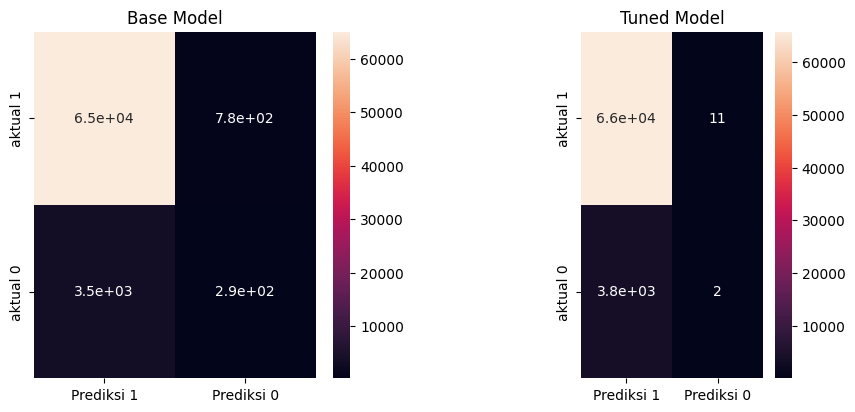

In [55]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_KNN_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_KNN_tuned, annot = True)
plt.title('Tuned Model')

### Decision Tree

In [56]:
param_DT = {
    'algo__min_samples_split': [2,1,3,4,6,8,10,],
    'algo__max_depth': [None,1,2,4,8,10,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,5,8]
}

model_DT = GridSearchCV(estimator=pipe_DT, param_grid=param_DT, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_DT.fit(X_train, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['amount',
                                                                          'currency',
                                                                          'created',
                                                                          'captured',
                                                                          'status',
                                                                          'city',
                                                                          'country',
                                                                          'state',
                                                                          'postal_code',
                                                                          'card_brand',
                                                                          'exp_month',
                                                                          'exp_year',
                                                                          'cvc_check',
                                                                          'risk_level',
                                                                          'risk_score',
                                                                          'network_status',
                                                                          'seller_message',
                                                                          'fraud_reason'])])),
                                       ('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 1, 2, 4, 8, 10, 12, 14, 18,
                                             20],
                         'algo__min_samples_leaf': [1, 2, 4, 5, 8],
                         'algo__min_samples_split': [2, 1, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [57]:
DT_tuned = model_DT.best_estimator_
DT_tuned_train = model_DT.best_score_
y_pred_DT_tuned = DT_tuned.predict(X_test) 

In [58]:
recall_DT_tuned = recall_score(y_test, y_pred_DT_tuned)
acc_DT_tuned = accuracy_score(y_test, y_pred_DT_tuned)
precision_DT_tuned = precision_score(y_test, y_pred_DT_tuned)
f1_DT_tuned = f1_score(y_test, y_pred_DT_tuned)
acc_DT_tuned_train = DT_tuned_train

print(f"Training Accuracy : {acc_DT_tuned_train}")
print(f"Testing Accuracy : {acc_DT_tuned}")


Training Accuracy : 0.9449281609195402
Testing Accuracy : 0.9449281609195402


In [59]:
print(classification_report(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3833
           1       0.94      1.00      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.47      0.50      0.49     69600
weighted avg       0.89      0.94      0.92     69600



In [60]:
cm_DT_tuned = confusion_matrix(y_test, y_pred_DT_tuned, labels = [1,0])
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_DT_base, df_DT_tuned], ['Base Model', 'Tuned Model'])


,Prediksi 1,Prediksi 0
aktual 1,62155,3612
aktual 0,2928,905
,Prediksi 1,Prediksi 0
aktual 1,65767,0
aktual 0,3833,0


Text(0.5, 1.0, 'Tuned Model')

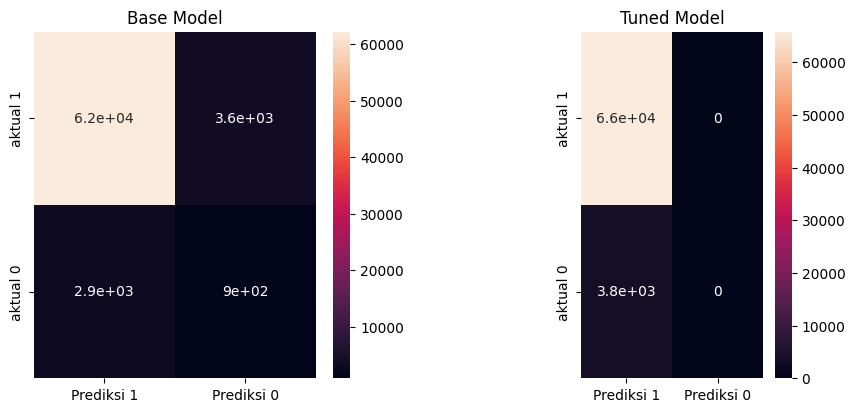

In [61]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_DT_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_DT_tuned, annot = True)
plt.title('Tuned Model')

### Random Forest 

In [62]:
param_RF = {
    'algo__min_samples_split': [2,3,4,6,8,10],
    'algo__max_depth': [None,12,14,18, 20],
    'algo__min_samples_leaf':[1,2,4,8],
    'algo__max_leaf_nodes':[None, 1,2,4]
}

model_RF = GridSearchCV(estimator=pipe_RF, param_grid=param_RF, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_RF.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['amount',
                                                                          'currency',
                                                                          'created',
                                                                          'captured',
                                                                          'status',
                                                                          'city',
                                                                          'country',
                                                                          'state',
                                                                          'postal_code',
                                                                          'card_brand',
                                                                          'exp_month',
                                                                          'exp_year',
                                                                          'cvc_check',
                                                                          'risk_level',
                                                                          'risk_score',
                                                                          'network_status',
                                                                          'seller_message',
                                                                          'fraud_reason'])])),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 12, 14, 18, 20],
                         'algo__max_leaf_nodes': [None, 1, 2, 4],
                         'algo__min_samples_leaf': [1, 2, 4, 8],
                         'algo__min_samples_split': [2, 3, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [63]:
RF_tuned = model_RF.best_estimator_
RF_tuned_train = model_RF.best_score_
y_pred_RF_tuned = RF_tuned.predict(X_test) 

In [64]:
recall_RF_tuned = recall_score(y_test, y_pred_RF_tuned)
acc_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
precision_RF_tuned = precision_score(y_test, y_pred_RF_tuned)
f1_RF_tuned = f1_score(y_test, y_pred_RF_tuned)
acc_RF_tuned_train = RF_tuned_train

print(f"Training Accuracy : {acc_RF_tuned_train}")
print(f"Testing Accuracy : {acc_RF_tuned}")

# from all the algorith that we tested so far we see that Random Forest has the highest accuracy among all of the algorithm 
# and now the tuned Random Forest doesn't have overfitting condition compared to the base model 

Training Accuracy : 0.9449425287356322
Testing Accuracy : 0.9449425287356322


In [65]:
print(classification_report(y_test, y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      3833
           1       0.94      1.00      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.81      0.50      0.49     69600
weighted avg       0.93      0.94      0.92     69600



In [66]:
cm_RF_tuned = confusion_matrix(y_test, y_pred_RF_tuned, labels = [1,0])
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_RF_base, df_RF_tuned], ['Base Model', 'Tuned Model'])

# from the comparison with the base model in term of the accuracy the tuned model has a slightly higher accuracy and 
# it doesn't have overfitting condition 
# but we see from the confusion matrix we see that tuned random forest has a slightly lower TRUE POSITIVE 
# (prediction cancelled & actully cancelled)
# compared to the based model


# Tuned Version of Random Forest also have a slightly higher FN (False Negative)
# (Prediction Not Canceled actually Cancelled)

# however the tuned model has a lower False Positive and Higher True Negative compared to the based model 
# that resulted in higer accuracy

,Prediksi 1,Prediksi 0
aktual 1,65704,63
aktual 0,3796,37
,Prediksi 1,Prediksi 0
aktual 1,65766,1
aktual 0,3831,2


Text(0.5, 1.0, 'Tuned Model')

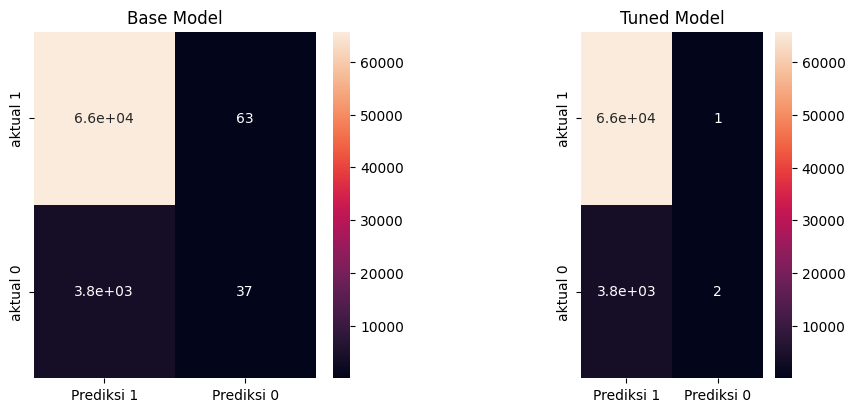

In [67]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_RF_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_RF_tuned, annot = True)
plt.title('Tuned Model')

### XGB 

In [68]:
pipe_XGB.get_params()

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['amount', 'currency', 'created', 'captured',
                                     'status', 'city', 'country', 'state',
                                     'postal_code', 'card_brand', 'exp_month',
                                     'exp_year', 'cvc_check', 'risk_level',
                                     'risk_score', 'network_status',
                                     'seller_message', 'fraud_reason'])])),
  ('algo',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
     

In [69]:
param_XGB = {
    'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
    'algo__max_depth': [6, 8, 10, 12],
    'algo__gamma':[0,1,2,3]
}

model_XGB = GridSearchCV(estimator=pipe_XGB, param_grid=param_XGB, cv = 3, n_jobs = -1, verbose = 1, scoring='accuracy')
model_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['amount',
                                                                          'currency',
                                                                          'created',
                                                                          'captured',
                                                                          'status',
                                                                          'city',
                                                                          'country',
                                                                          'state',
                                                                          'postal_code',
                                                                          'card_brand',
                                                                          'exp_month',
                                                                          'exp_year',
                                                                          'cvc_check',
                                                                          'risk_level',
                                                                          'risk_score',
                                                                          'network_status',
                                                                          'seller_message',
                                                                          'fraud_reas...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'algo__gamma': [0, 1, 2, 3],
                         'algo__learning_rate': [0.300000012, 0.5, 0.7, 0.8],
                         'algo__max_depth': [6, 8, 10, 12]},
             scoring='accuracy', verbose=1)

In [70]:
XGB_tuned = model_XGB.best_estimator_
XGB_tuned_train = model_XGB.best_score_
y_pred_XGB_tuned = XGB_tuned.predict(X_test) 

In [71]:
recall_XGB_tuned = recall_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned = accuracy_score(y_test, y_pred_XGB_tuned)
precision_XGB_tuned = precision_score(y_test, y_pred_XGB_tuned)
f1_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned_train = XGB_tuned_train

print(f"Training Accuracy : {acc_XGB_tuned_train}")
print(f"Testing Accuracy : {acc_XGB_tuned}")

# compared to the base model XGB tuned model has a slightly better accuracy score 
#we will check the confusion matrix comparison between the base model and the tuned model 

Training Accuracy : 0.9449209770114942
Testing Accuracy : 0.9449568965517241


In [72]:
print(classification_report(y_test, y_pred_XGB_tuned))

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      3833
           1       0.94      1.00      0.97     65767

    accuracy                           0.94     69600
   macro avg       0.81      0.50      0.49     69600
weighted avg       0.93      0.94      0.92     69600



In [73]:
cm_XGB_tuned = confusion_matrix(y_test, y_pred_XGB_tuned, labels = [1,0])
df_XGB_tuned = pd.DataFrame(data = cm_XGB_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])


display_side_by_side([df_XGB_base, df_XGB_tuned], ['Base Model', 'Tuned Model'])

# from the comparison of both confusion matrix we see that 
# the tuned model has a slightly higher TP (True Positive)
# prediction canceled actual canceled

# the tuned model also has a lower FN (False Negative)
# prediction not cancelled actual cancelled


# both the tuned and the base model has almost similar False Positive & True Negative value

,Prediksi 1,Prediksi 0
aktual 1,65647,120
aktual 0,3755,78
,Prediksi 1,Prediksi 0
aktual 1,65765,2
aktual 0,3829,4


Text(0.5, 1.0, 'Tuned Model')

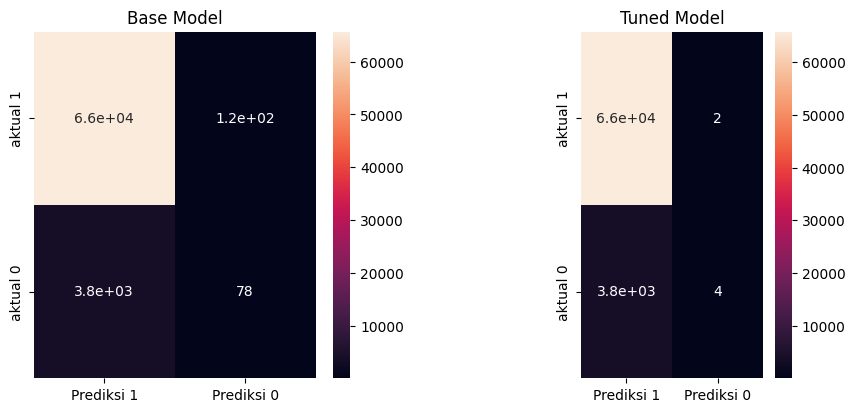

In [74]:
plt.figure(figsize = (10, 4.5))

plt.subplot(1,2,1)
sns.heatmap(df_XGB_base, annot = True)
plt.title('Base Model')

plt.subplot(1,3,3)
sns.heatmap(df_XGB_tuned, annot = True)
plt.title('Tuned Model')

In [75]:
evaluation_matrix_tuned = {
    'Logistic Regression': [acc_logreg_tuned, recall_logreg_tuned, precision_logreg_tuned, f1_logreg_tuned],
    'KNN':[acc_KNN_tuned,recall_KNN_tuned,precision_KNN_tuned, f1_KNN_tuned],
    'Decision Tree':[acc_DT_tuned, recall_DT_tuned, precision_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF_tuned, recall_RF_tuned, precision_RF_tuned, f1_RF_tuned],
    'XGB':[acc_XGB_tuned, recall_XGB_tuned, precision_XGB_tuned, f1_XGB_tuned]
}

eva_tuned = pd.DataFrame(data = evaluation_matrix_tuned, index = ['Accucary', 'Recall', 'Precision', 'F1 Score'])

evaluation_matrix_tuned_training = {
    "training" : [acc_logreg_tuned_train, acc_KNN_tuned_train, acc_DT_tuned_train, acc_RF_tuned_train, acc_XGB_tuned_train],
    "testing": [acc_logreg_tuned, acc_KNN_tuned, acc_DT_tuned, acc_RF_tuned, acc_XGB_tuned]
}

eva_tuned_train = pd.DataFrame(data = evaluation_matrix_tuned_training, index = ['Logreg', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'])


### Comparing Each Evaluation Matrix 

#### Base Model

In [76]:
display_side_by_side([eva_base, eva_base_train], ['Evaluation Matrix', 'Accuracy Train & Test'])


#### Tuned Model

In [77]:
display_side_by_side([eva_tuned, eva_tuned_train], ['Evaluation Matrix', 'Accuracy Train & Test'])


### Heatmap After Tuning

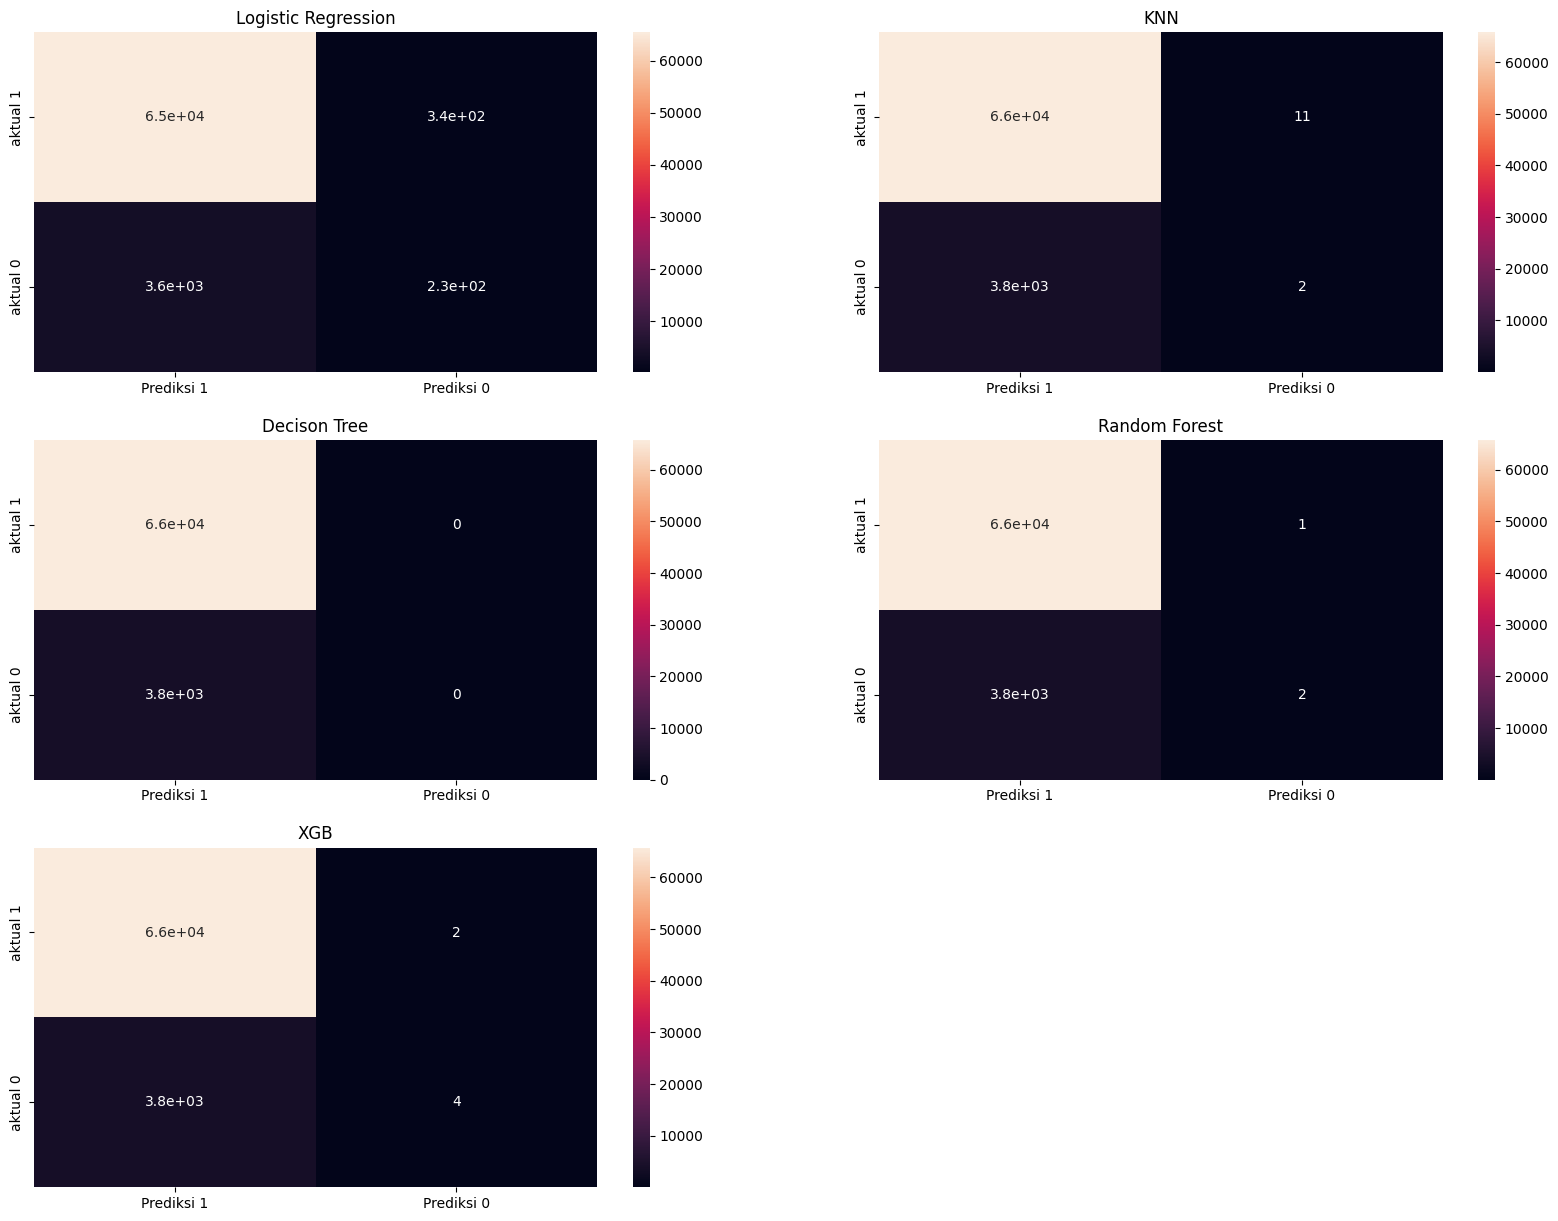

In [78]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sns.heatmap(df_logreg_tuned, annot=True)
plt.title("Logistic Regression")

plt.subplot(3,2,2)
sns.heatmap(df_KNN_tuned, annot = True)
plt.title('KNN')

plt.subplot(3,2,3)
sns.heatmap(df_DT_tuned, annot = True)
plt.title('Decison Tree')

plt.subplot(3,2,4)
sns.heatmap(df_RF_tuned, annot = True)
plt.title('Random Forest')

plt.subplot(3,2,5)
sns.heatmap(df_XGB_tuned, annot = True)
plt.title("XGB")

plt.show()


### Exporting The Models

In [79]:
joblib.dump(RF_tuned, 'cc_tuned.pkl')

['cc_tuned.pkl']